In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
 plt.figure(figsize = (15,2))
 plt.imshow(X[index])
 plt.xlabel(classes[y[index]])

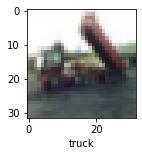

In [ ]:
plot_sample(X_train, y_train, 2)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
layers.Flatten(input_shape=(32,32,3)),
layers.Dense(3000, activation='relu'),
layers.Dense(1000, activation='relu'),
layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8105 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 98s 62ms/step - loss: 1.6233 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5410 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4816 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4318 - accuracy: 0.4968


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,
y_pred_classes))

313/313 [==============================] - 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.43      0.51      1000
           1       0.65      0.60      0.62      1000
           2       0.39      0.30      0.34      1000
           3       0.30      0.54      0.39      1000
           4       0.32      0.57      0.41      1000
           5       0.59      0.17      0.26      1000
           6       0.48      0.63      0.55      1000
           7       0.50      0.54      0.52      1000
           8       0.65      0.57      0.61      1000
           9       0.72      0.36      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



In [ ]:
cnn = models.Sequential([
layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),

layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4745 - accuracy: 0.4688
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1353 - accuracy: 0.6029
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0034 - accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9140 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8424 - accuracy: 0.7082
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7932 - accuracy: 0.7234
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7485 - accuracy: 0.7413
Epoch 8/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7090 - accuracy: 0.7536
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6756 - accuracy: 0.7646
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9655 - accuracy: 0.6868


[0.9655106663703918, 0.6868000030517578]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[7.7771354e-03, 1.3254534e-03, 2.7831158e-04, 8.8828099e-01,
        1.3240081e-03, 2.8667832e-02, 3.6745206e-02, 2.5676775e-06,
        3.5580937e-02, 1.7501166e-05],
       [2.5644380e-01, 4.4131339e-02, 1.9971347e-05, 1.4892187e-07,
        8.2241947e-09, 1.6792709e-10, 1.8030358e-09, 1.3428531e-08,
        6.9837940e-01, 1.0253433e-03],
       [4.3650367e-03, 1.0719388e-02, 6.1199936e-04, 1.0269549e-03,
        1.5127150e-05, 4.8527536e-06, 2.8327346e-05, 2.8946806e-05,
        9.7858757e-01, 4.6118069e-03],
       [8.1055653e-01, 3.2999078e-03, 3.6903169e-02, 1.7421037e-02,
        5.5122644e-05, 5.0687249e-05, 1.3672748e-04, 5.7591428e-06,
        1.2994388e-01, 1.6272902e-03],
       [4.7976723e-06, 2.0628107e-05, 6.7204884e-03, 6.1842144e-02,
        2.1351804e-01, 7.8536905e-03, 7.1003294e-01, 2.7448173e-06,
        1.7311180e-06, 2.7344552e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 4, 4]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

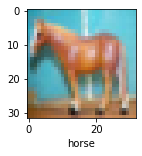

In [ ]:
plot_sample(X_test, y_test,137)

In [ ]:
classes[y_classes[137]]

'horse'